# Importing Neccessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Loading the Built-in Sklearn Breast Cancer Dataset

In [1]:
import os

train = os.path.join("data2", "train")
test = os.path.join("data2", "test")
val = os.path.join("data2", "valid")


# Reading the images

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define paths
train_data_path = os.path.join("data2", "train")
test_data_path = os.path.join("data2", "test")
val_data_path = os.path.join("data2", "valid")

categories = ["0", "1"]
train_data = []
for category in categories:
    category_path = os.path.join(train_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        train_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████| 803/803 [00:08<00:00, 94.89it/s]


# Preparing the Model

In [13]:
#print(len(train_data))
len(train_data)

2372

In [14]:
categories = ["0", "1"]
test_data = []
for category in categories:
    category_path = os.path.join(test_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        test_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 89.43it/s]


In [15]:
len(test_data)

336

In [16]:
categories = ["0", "1"]
val_data = []
for category in categories:
    category_path = os.path.join(val_data_path, category)
    index = categories.index(category)
    for image in tqdm.tqdm(os.listdir(category_path)):
        img_path = os.path.join(category_path, image)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        val_data.append([img, index])

100%|███████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:02<00:00, 86.00it/s]


In [17]:
len(val_data)

675

In [18]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(val_data)

In [19]:
x_train_list = []
y_train_list = []
for image, label in train_data:
    x_train_list.append(image)
    y_train_list.append(label)
    
x_train = np.array(x_train_list)/255
y_train = np.array(y_train_list)

In [20]:
x_train.shape

(2372, 224, 224, 3)

In [21]:
x_test_list = []
y_test_list = []
for image, label in test_data:
    x_test_list.append(image)
    y_test_list.append(label)
    
x_test = np.array(x_test_list)/255
y_test = np.array(y_test_list)

In [22]:
x_test.shape

(336, 224, 224, 3)

In [23]:
y_test.shape

(336,)

In [24]:
x_val_list = []
y_val_list = []
for image, label in val_data:
    x_val_list.append(image)
    y_val_list.append(label)
    
x_val = np.array(x_val_list)/255
y_val = np.array(y_val_list)

In [25]:
x_val.shape

(675, 224, 224, 3)

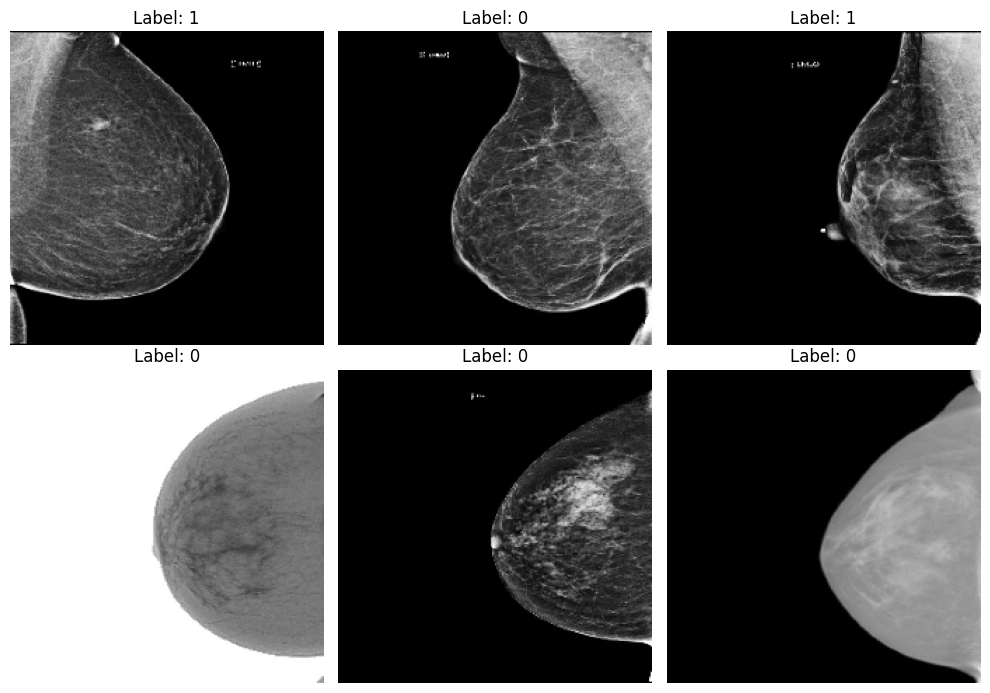

In [26]:
num_images = 6


random_indices = np.random.choice(len(x_train), num_images, replace=False)


fig, axes = plt.subplots(2, 3, figsize=(10, 7))


for i, idx in enumerate(random_indices):
    ax = axes[i // 3, i % 3]  
    ax.imshow(x_train[idx], cmap='gray')  
    ax.set_title(f"Label: {y_train[idx]}")  
    ax.axis('off')


plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Input shape (224, 224, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before feeding into dense layers
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])

# Model summary to check architecture
model.summary()


D:\MINU\S-7\deeplearning\project\DeepENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 64)          │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,749,669 (10.49 MB)

 Trainable params: 2,749,669 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_val, y_val))

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6339 - loss: 0.6809 - val_accuracy: 0.6637 - val_loss: 0.6356
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6721 - loss: 0.6382 - val_accuracy: 0.6637 - val_loss: 0.6277
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6602 - loss: 0.6281 - val_accuracy: 0.6415 - val_loss: 0.6343
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6644 - loss: 0.6334 - val_accuracy: 0.6607 - val_loss: 0.6299
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6864 - loss: 0.6067 - val_accuracy: 0.6756 - val_loss: 0.6225
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7027 - loss: 0.5883 - val_accuracy: 0.6622 - val_loss: 0.6319
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7209 - loss: 0.5653 - val_accuracy: 0.6667 - val_loss: 0.6321
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7259 - loss: 0.5315 - val_accuracy: 0.6741 - val_loss:

# Plots of Accuracy and Loss

In [29]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

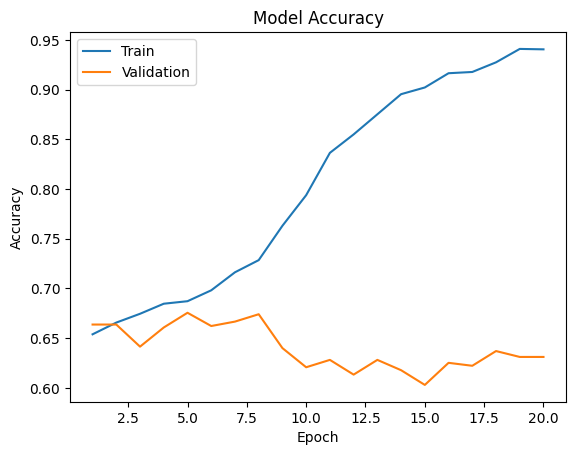

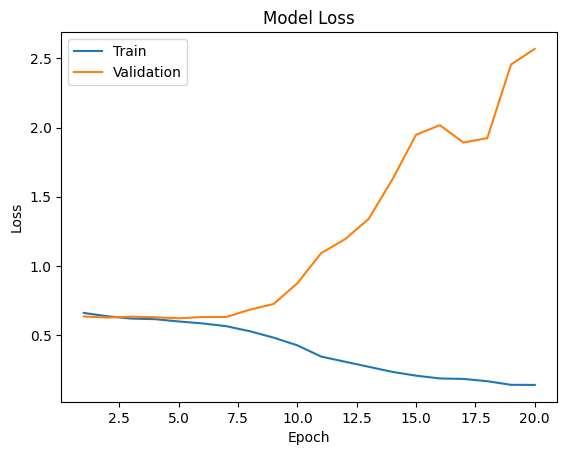

In [30]:
plotLearningCurve(history,20)

In [31]:
model2 = Sequential()

model2.add(Conv2D(100,(3, 3), activation = "relu", input_shape = (224, 224, 3)))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(100,(3, 3), activation = "relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(64,(3, 3), activation = "relu"))
#model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(64,(3, 3), activation = "relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Flatten())
model2.add(Dense(64, activation = "relu"))
model2.add(Dropout(.2))
#model2.add(Dense(32, activation = "relu"))
model2.add(Dropout(.3))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(1, activation = 'sigmoid'))


model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 64)          │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,749,669 (10.49 MB)

 Trainable params: 2,749,669 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
# Now fit the model with the reshaped data
history2 = model2.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_val, y_val))


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6474 - loss: 0.6525 - val_accuracy: 0.6637 - val_loss: 0.6428
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6657 - loss: 0.6358 - val_accuracy: 0.6637 - val_loss: 0.6422
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6461 - loss: 0.6433 - val_accuracy: 0.6637 - val_loss: 0.6230
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6618 - loss: 0.6212 - val_accuracy: 0.6696 - val_loss: 0.6258
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6777 - loss: 0.6040 - val_accuracy: 0.6652 - val_loss: 0.6245
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6727 - loss: 0.6082 - val_accuracy: 0.6593 - val_loss: 0.6161
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6859 - loss: 0.6015 - val_accuracy: 0.6578 - val_loss: 0.6187
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6887 - loss: 0.5809 - val_accuracy: 0.6622 - val_loss

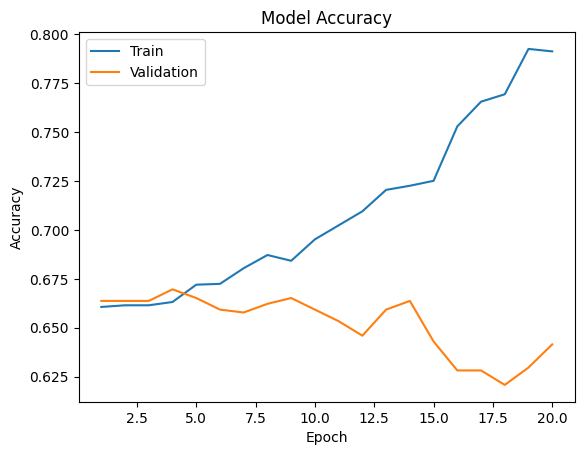

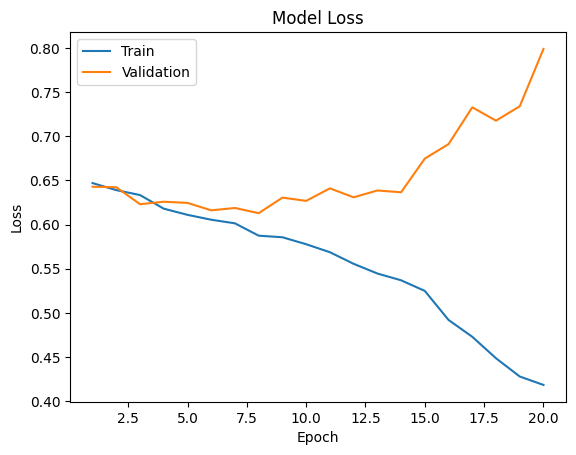

In [36]:
plotLearningCurve(history2,20)

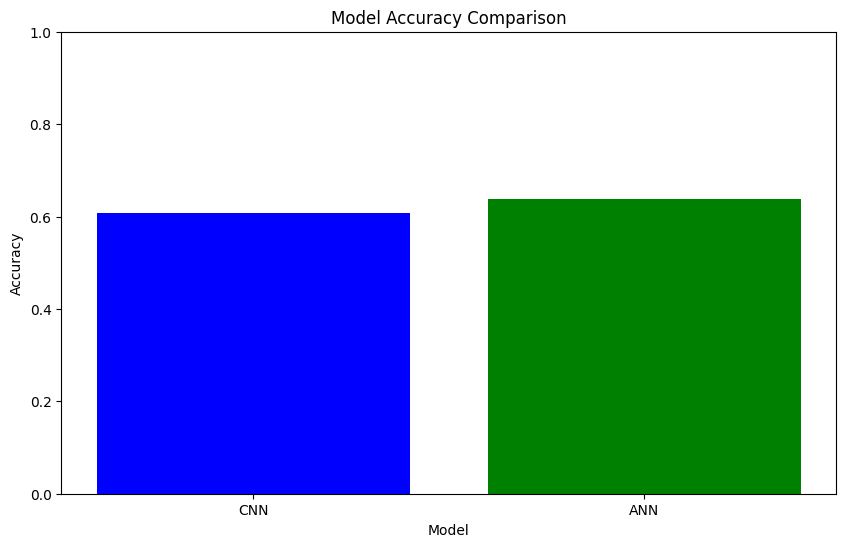

In [57]:
# Model 1 (CNN)
cnn_test_acc = model.evaluate(x_test, y_test, verbose=0)[1]  # Accuracy of CNN

# Model 2 (ANN) - with reshaping
ann_test_acc = model2.evaluate(x_test, y_test, verbose=0)[1]  # Accuracy of ANN

# Visualize the accuracy comparison
import matplotlib.pyplot as plt

model_names = ['CNN', 'ANN']
accuracies = [cnn_test_acc, ann_test_acc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [58]:
# CNN predictions
cnn_pred = (model.predict(x_test) > 0.5).astype("int32")

# ANN predictions
ann_pred = (model2.predict(x_test) > 0.5).astype("int32")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step


In [60]:
from sklearn.metrics import confusion_matrix

# CNN confusion matrix
cnn_cm = confusion_matrix(y_test, cnn_pred)

# ANN confusion matrix
ann_cm = confusion_matrix(y_test, ann_pred)

# Optionally, print the confusion matrices
print("Confusion Matrix for CNN:\n", cnn_cm)
print("Confusion Matrix for ANN:\n", ann_cm)


Confusion Matrix for CNN:
 [[162  46]
 [ 86  42]]
Confusion Matrix for ANN:
 [[174  34]
 [ 88  40]]


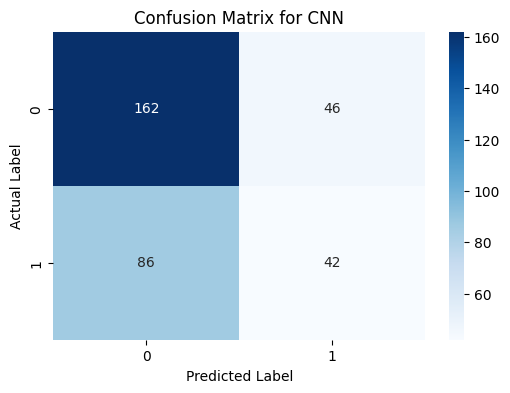

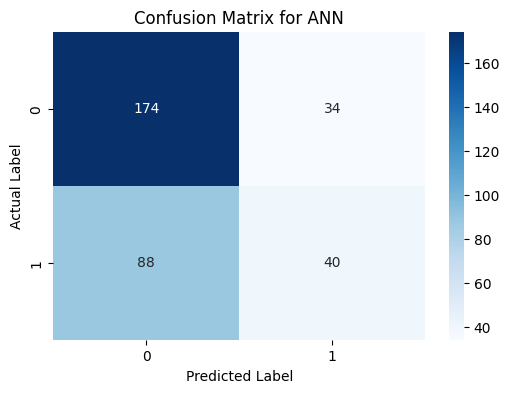

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(cnn_cm, "Confusion Matrix for CNN")
plot_confusion_matrix(ann_cm, "Confusion Matrix for ANN")
